
*Note:* You can run this from your computer (Jupyter or terminal), or use one of the
hosted options:

[![binder-logo](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/ploomber/binder-env/main?urlpath=git-pull%3Frepo%3Dhttps%253A%252F%252Fgithub.com%252Fploomber%252Fprojects%26urlpath%3Dlab%252Ftree%252Fprojects%252Fspec-api-python%252FREADME.ipynb%26branch%3Dmaster)

[![deepnote-logo](https://deepnote.com/buttons/launch-in-deepnote-small.svg)](https://deepnote.com/launch?template=deepnote&url=https://github.com/ploomber/projects/blob/master/spec-api-python/README.ipynb)


# Your first Python pipeline

This guide shows you how to run your first Ploomber pipeline.

**Note:** This is intended for a quick and interactive experience. If you want
to learn about Ploomber's core concepts and design rationale, go to the
[the next tutorial](https://ploomber.readthedocs.io/en/stable/get-started/basic-concepts.html)

## Setup (skip if using deepnote or binder)

Get code (run in a terminal):

~~~sh
git clone https://github.com/ploomber/projects
cd projects/spec-api-python
~~~

Install dependencies:

~~~sh
# if using conda
conda env create --file environment.yaml
conda activate spec-api-python

# otherwise use pip directly
pip install -r requirements.txt
~~~

## Description

This pipeline contains 3 **tasks**, the first task `get.py` gets some data,
`clean.py` cleans it and `plot.py` generates a visualization:

In [1]:
%%sh
ls *.py

clean.py
plot.py
raw.py


These three scripts make up our pipeline (or **DAG**), which is a collection
of tasks with a pre-defined execution order.

**Note:** These tasks are Python scripts, but you can use functions, notebooks,
and even SQL scripts. The following guide explains how other types of tasks work.

Along with the `*.py` files, there is a `pipeline.yaml` file where we declare
which files we use as tasks:

In [2]:
%%sh
cat pipeline.yaml

tasks:
  - source: raw.py
    product:
      nb: output/raw.ipynb
      data: output/data.csv

  - source: clean.py
    product:
      nb: output/clean.ipynb
      data: output/clean.csv

  - source: plot.py
    product: output/plot.ipynb


**Note:** The `pipeline.yaml` file is optional, but it gives you more flexibility.
[Click here](https://github.com/ploomber/projects/tree/master/spec-api-directory) to see an example without a `pipeline.yaml` file.

Let's plot the pipeline:

In [3]:
%%sh
# Note: plotting doesn't work in deepnote
ploomber plot

Plot saved at: pipeline.png


100%|██████████| 3/3 [00:00<00:00, 4322.54it/s]


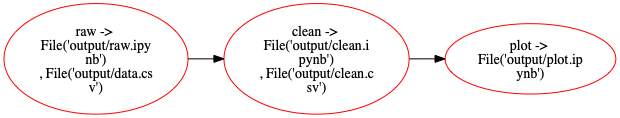

In [4]:

from IPython.display import Image
Image(filename='pipeline.png')

The `status` command gives us an overview of the pipeline:

In [5]:
%%sh
ploomber status

name    Last run      Outdated?    Product       Doc (short)    Location
------  ------------  -----------  ------------  -------------  ------------
raw     Has not been  Source code  MetaProduct(                 /Users/Edu/d
        run                        {'data': Fil                 ev/projects-
                                   e('output/da                 ploomber/spe
                                   ta.csv'),                    c-api-python
                                   'nb': File('                 /raw.py
                                   output/raw.i
                                   pynb')})
clean   Has not been  Source code  MetaProduct(                 /Users/Edu/d
        run           & Upstream   {'data': Fil                 ev/projects-
                                   e('output/cl                 ploomber/spe
                                   ean.csv'),                   c-api-python
                                   'nb': File('                 /clean

100%|██████████| 3/3 [00:00<00:00, 4725.09it/s]


## How is execution order determined?

Ploomber infers the pipeline structure from your code. If task B uses output from
task A as input, we say A is an **upstream** dependency of B. For example, to
clean the data, we must get it first; hence, we declare the following in `clean.py`:

~~~python
# execute 'raw" task before 'clean'
upstream = ['raw']
~~~

Once we finish cleaning the data, we must save it somewhere (this is known
as a **product**). Products can be files or SQL relations. Our current example
only generates files.

To specify where to save the output of each task, we use the `product`
key. For example, the `raw` task definition looks like this:

~~~yaml
- source: raw.py
  product:
    nb: output/raw.ipynb
    data: output/data.csv
~~~

Scripts and notebooks automatically generate a copy of themselves in Jupyter
notebook format (`.ipynb`). That's why we see a notebook in the `product`
dictionary (`nb` key). The notebook format allows us to generate standalone
files with charts and tables, no need to write extra code to save our charts!

This is a key concept: `raw.py` is part of the pipeline's source code but
`output/raw.ipynb` is not. It is an artifact generated by the source code.

If you don't want to generate output noteboks, you can use a Python function
as tasks. Our next tutorial goes deeper into the different types of tasks
available.

## Building the pipeline

Let's build the pipeline:

In [6]:
%%sh
mkdir output
ploomber build

name    Ran?      Elapsed (s)    Percentage
------  ------  -------------  ------------
raw     True          3.8356        40.605
clean   True          1.55765       16.4899
plot    True          4.05287       42.9051


Building task "plot": 100%|██████████| 3/3 [00:09<00:00,  3.16s/it]


This pipeline saves all the output in the `output/` directory; we have a few
data files:

In [7]:
%%sh
ls output/*.csv

output/clean.csv
output/data.csv


And a notebook for each script:

In [8]:
%%sh
ls output/*.ipynb

output/clean.ipynb
output/plot.ipynb
output/raw.ipynb


## Updating the pipeline

Quick experimentation is essential to develop a data pipeline. Ploomber allows
you to quickly run new experiments without having to keep track of tasks
dependencies.

Let's say you found a problematic column in the data and want to add more
cleaning logic to your `clean.py` script. `raw.py` does not depend
on `clean.py`, but `plot.py` does. If you modify `clean.py`, you'd have
to execute `clean.py` and then `plot.py` to bring your pipeline up-to-date.

As your pipeline grows, keeping track of task dependencies gets time-consuming.
Ploomber does that for you and only executes outdated tasks on each run.

Make some changes to the `clean.py` script, then build again:

In [9]:
%%sh
ploomber build

name    Ran?      Elapsed (s)    Percentage
------  ------  -------------  ------------
raw     False               0             0
clean   False               0             0
plot    False               0             0


0it [00:00, ?it/s]


You'll see that `raw.py` didn't run because it was not affected by the change!

## Where to go from here

This tutorial showed how to build a pipeline with Ploomber; however, it only
superficially covered Ploomber's core concepts and design rationale. [the next
tutorial](https://ploomber.readthedocs.io/en/stable/get-started/basic-concepts.html)
goes deeper in those terms.